<h1>Import Data:</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

df = pd.read_csv('Advertising.csv')
df = df.drop(columns=['Unnamed: 0'])
print(df)
df_np = df.to_numpy()

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


<h1>Plot Graph:</h1>

(200, 3)
(200,)


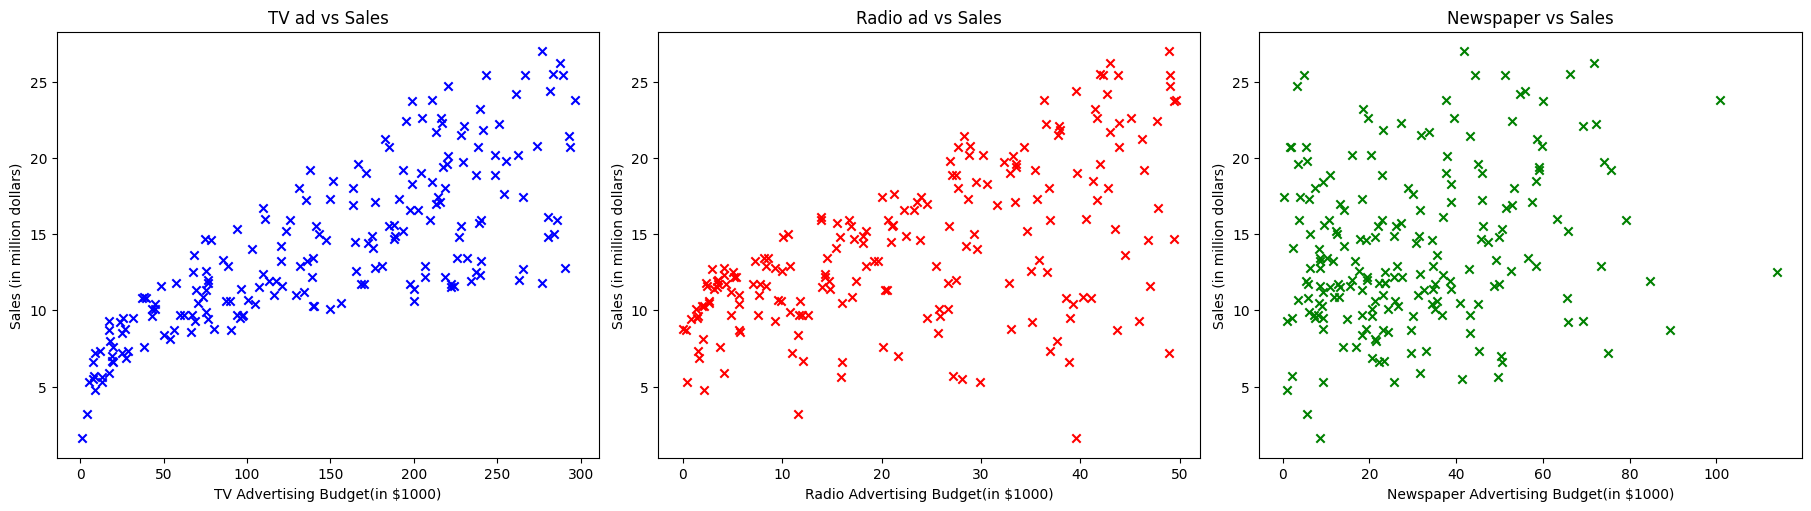

In [98]:
x_train = df_np[:,:3]
y_train = df_np[:,-1]

# Normalize the features
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean) / std

print(x_train.shape)
print(y_train.shape)

#plt.scatter(x_train,y_train,marker='x',c='r')

# Set up the subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True, figsize=(18, 5))

# First subplot: TV vs Sales
ax1.scatter(df['TV'], df['Sales'], marker='x', color='b')
ax1.set_title('TV ad vs Sales')
ax1.set_xlabel('TV Advertising Budget(in $1000)')
ax1.set_ylabel('Sales (in million dollars)')

# Second subplot: Radio vs Sales
ax2.scatter(df['Radio'], df['Sales'], marker='x', color='r')
ax2.set_title('Radio ad vs Sales')
ax2.set_xlabel('Radio Advertising Budget(in $1000)')
ax2.set_ylabel('Sales (in million dollars)')

# Third subplot: Newspaper vs Sales
ax3.scatter(df['Newspaper'], df['Sales'], marker='x', color='g')
ax3.set_title('Newspaper vs Sales')
ax3.set_xlabel('Newspaper Advertising Budget(in $1000)')
ax3.set_ylabel('Sales (in million dollars)')

# Show the plots
plt.show()

<h1>Cost Function, Gredient Descent:</h1>

In [26]:
#Function to calculate the cost
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost=0

    for i in range (m):
        f_wb= np.dot(w, x[i]) + b
        cost = cost + (f_wb - y[i])**2
    total_cost= 1/(2*m)*cost

    return total_cost


#Function to calculate derivatives of gradient descent
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = np.zeros_like(w,dtype=float)
               ########################
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w,x[i])+b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

#Function to calculate gradient descent
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    b = b_in    
    J_history = []
    p_history = []
    

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        #Save cost J at each iteration
        if i<100000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
            f"dj_dw: {repr(dj_dw)}, dj_db: {dj_db:0.3e}, ",
            f"w: {repr(w)}, b: {b:0.5e}")
                  ######
    return w, b, J_history, p_history #return w and J,w history for graphing    

#initialize parameter
b_init = 0
w_init = np.zeros(x_train.shape[1])
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-3

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: {', '.join([f'{elem:8.4f}' for elem in w_final])}, {b_final:8.4f}")
                                                        #################################################

Iteration    0: Cost 1.12e+02  dj_dw: array([-4.07100612, -2.9988908 , -1.18815867]), dj_db: -1.402e+01,  w: array([0.00407101, 0.00299889, 0.00118816]), b: 1.40225e-02
Iteration 1000: Cost 1.61e+01  dj_dw: array([-1.42938289, -0.9476    ,  0.00460471]), dj_db: -5.156e+00,  w: array([2.5223356 , 1.76325055, 0.42591671]), b: 8.87165e+00
Iteration 2000: Cost 3.42e+00  dj_dw: array([-0.51111792, -0.34741174,  0.15276716]), dj_db: -1.896e+00,  w: array([3.41362233, 2.3534502 , 0.31418504]), b: 1.21286e+01
Iteration 3000: Cost 1.68e+00  dj_dw: array([-0.18529497, -0.14762304,  0.11492431]), dj_db: -6.971e-01,  w: array([3.73426601, 2.58425093, 0.17639965]), b: 1.33261e+01
Iteration 4000: Cost 1.43e+00  dj_dw: array([-0.0678625 , -0.069899  ,  0.06784776]), dj_db: -2.563e-01,  w: array([3.8510339 , 2.68745612, 0.086176  ]), b: 1.37664e+01
Iteration 5000: Cost 1.40e+00  dj_dw: array([-0.0250425 , -0.03521375,  0.03703219]), dj_db: -9.425e-02,  w: array([3.89394222, 2.73784917, 0.03510151]), b

<h1>Convergence of Gradient Descent:</h1>

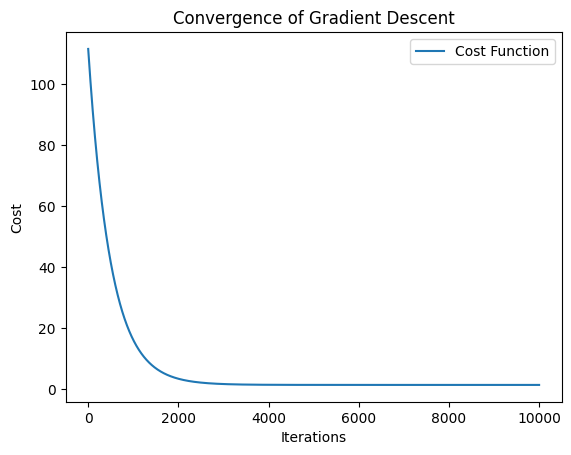

In [27]:
# Plot cost function over iterations
plt.plot(range(len(J_hist)), J_hist, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.show()

<h1>Model Accuracy:</h1>

In [96]:
# Calculate R-squared (R²)
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Predicted values using your model
y_pred = predict(w_final, b_final, x_train)

# Calculate R² and MAPE
r2 = r_squared(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)

print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


R-squared (R²): 0.90
Mean Absolute Percentage Error (MAPE): 13.88%


<h1>Predtion model:</h1>

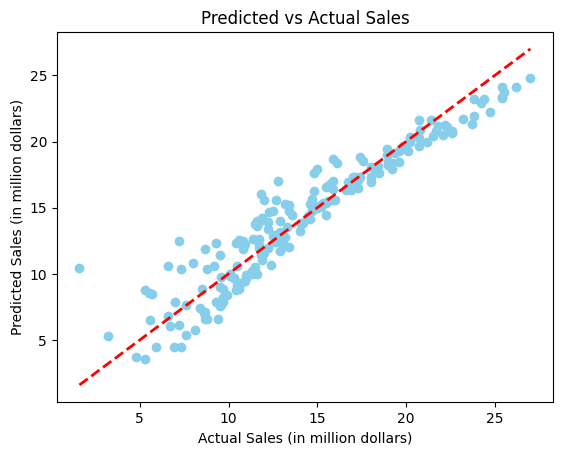

In [101]:
#Final Model
def predict(w_final,b_final,x):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(w_final,x[i]) + b_final

    return f_wb

y_pred = calculate_model_output(w_final,b_final,x_train)

# Visualize predictions vs actual
plt.scatter(y_train, y_pred, color='skyblue', marker = 'o')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Sales (in million dollars)')
plt.ylabel('Predicted Sales (in million dollars)')
plt.title('Predicted vs Actual Sales')
plt.show()

In [100]:
### Take input for 3 features and convert to a numpy array of floats
custom_features = np.array(input("Enter 3 values for TV, Radio, and Newspaper (comma-separated): ").split(','), dtype=float)

# Normalize the custom input using training data mean and std
custom_features_normalized = (custom_features - mean) / std

# Predict sales using the model
predicted_sales = np.dot(custom_features_normalized, w_final) + b_final

print(f"Predicted Sales: {predicted_sales:.2f} Million dollars")

Enter 3 values for TV, Radio, and Newspaper (comma-separated):  321,64,12


Predicted Sales: 29.67 Million dollars
